## EDA

In [1]:
source('../src/util.r')
source('../src/multiplot.r')

In [2]:
ames_housing_df <- loadCleanAmesData()

In [3]:
dim(ames_housing_df)

[1] 1460   80

In [4]:
head(ames_housing_df)

MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,⋯,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,⋯,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,⋯,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
50,RL,85,14115,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,⋯,0,No Pool,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [5]:
ames_num_features_df = Filter(is.numeric, ames_housing_df)
str(ames_num_features_df)

'data.frame':	1460 obs. of  24 variables:
 $ LotFrontage  : num  65 80 68 60 84 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ YearBuilt    : int  2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 ...
 $ YearRemodAdd : int  2003 1976 2002 1970 2000 1995 2005 1973 1950 1950 ...
 $ MasVnrArea   : num  196 0 162 0 350 0 186 240 0 0 ...
 $ BsmtFinSF1   : int  706 978 486 216 655 732 1369 859 0 851 ...
 $ BsmtFinSF2   : int  0 0 0 0 0 0 0 32 0 0 ...
 $ BsmtUnfSF    : int  150 284 434 540 490 64 317 216 952 140 ...
 $ TotalBsmtSF  : int  856 1262 920 756 1145 796 1686 1107 952 991 ...
 $ FirstFlrSF   : int  856 1262 920 961 1145 796 1694 1107 1022 1077 ...
 $ SecondFlrSF  : int  854 0 866 756 1053 566 0 983 752 0 ...
 $ LowQualFinSF : int  0 0 0 0 0 0 0 0 0 0 ...
 $ GrLivArea    : int  1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 ...
 $ GarageYrBlt  : num  2003 1976 2001 1998 2000 ...
 $ GarageArea   : int  548 460 608 642 836 480 636 484 468 20

In [6]:
library(repr)
library(ggplot2)
options(repr.plot.width=20, repr.plot.height=8)

### Distributions

Let's view the distributions of the target (Sale Price) and some of the features to understand how the styles and features of homes are priced in Ames, Iowa 

#### Kernel Density Estimate (KDE) of the target, SalePrice



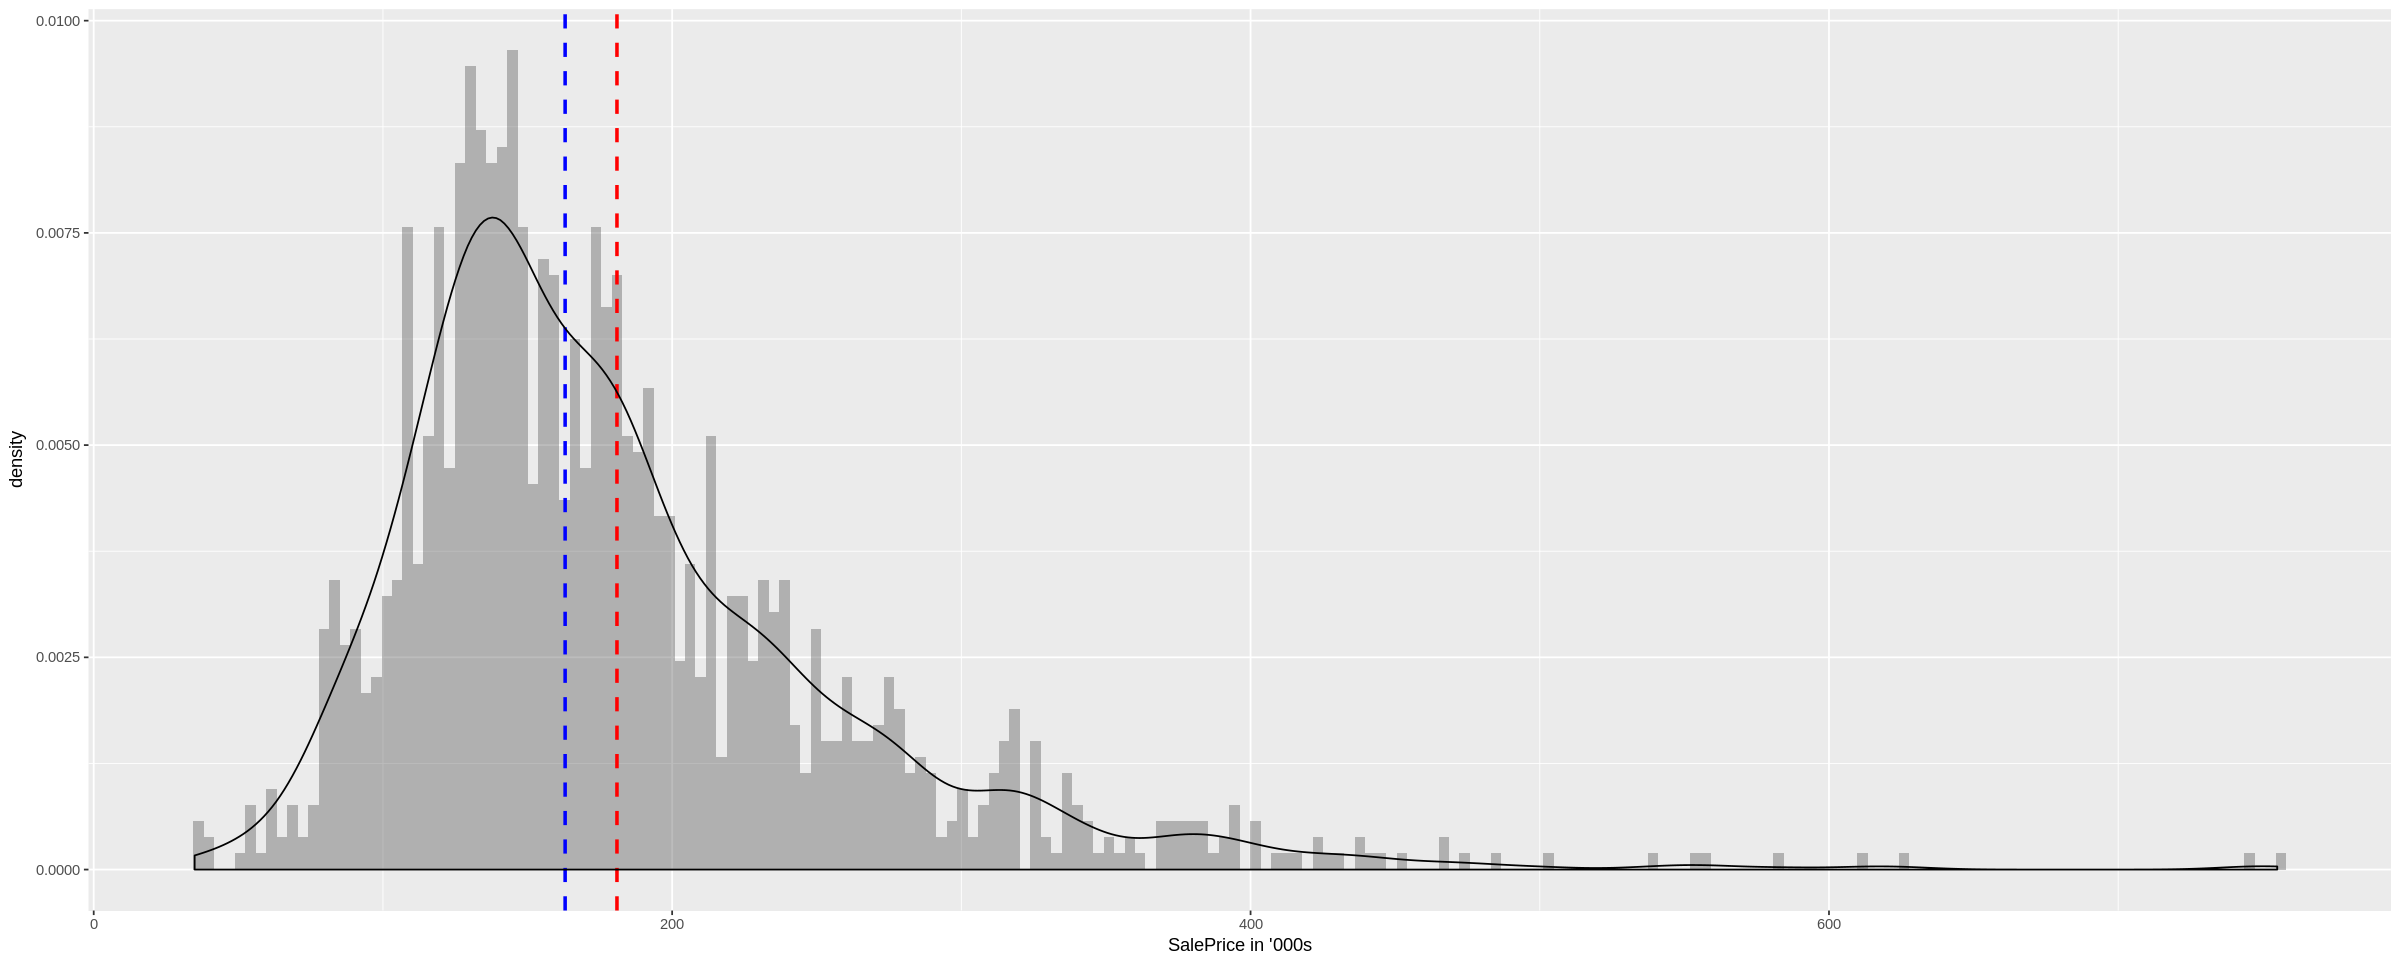

In [7]:
hist_with_kde(ames_housing_df$SalePrice/1000, "SalePrice in '000s")

The distribution plot seems to be skewed to the right, showing a long tail on the right. We can see that SalePrice of houses range from approximately 30K - 800K. The curve peaks at roughly 150K indicating that, that is the most popular SalePrice in the neihborhood. The Sales Price of most homes in the Ames, Iowa neighborhood, range from 50K - 350K, but there are some that are ranged from  $350K - $800K and it is these few higher priced homes that are dragging the mean of Sale Price (red horizontal line) away from the peak of the curve.

#### Kernel Density Estimate(KDE) of some numerical features

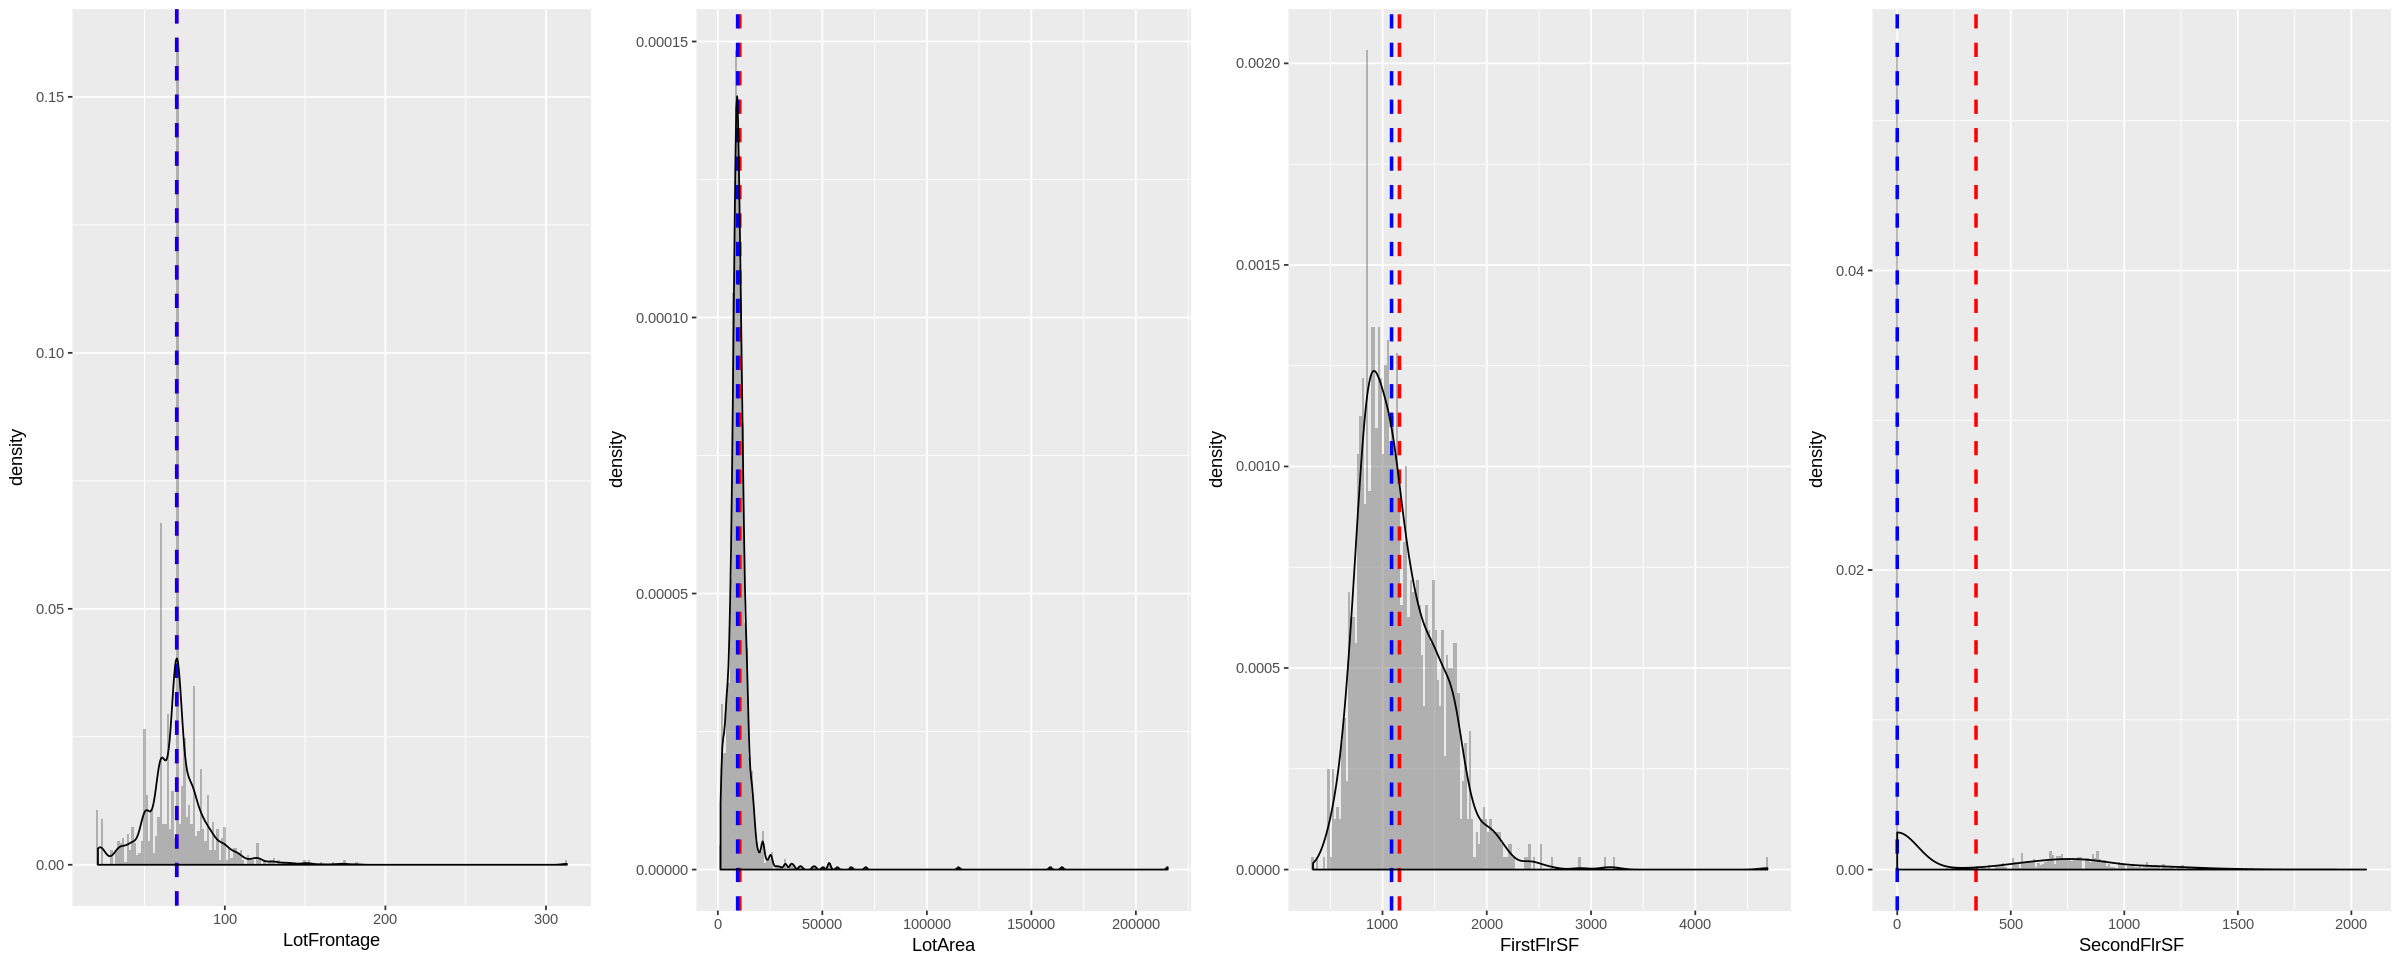

In [8]:
multiplot(hist_with_kde(ames_housing_df$LotFrontage, "LotFrontage"),
          hist_with_kde(ames_housing_df$LotArea, "LotArea"), 
          hist_with_kde(ames_housing_df$FirstFlrSF, "FirstFlrSF"),
          hist_with_kde(ames_housing_df$SecondFlrSF, "SecondFlrSF"),
          cols = 4)

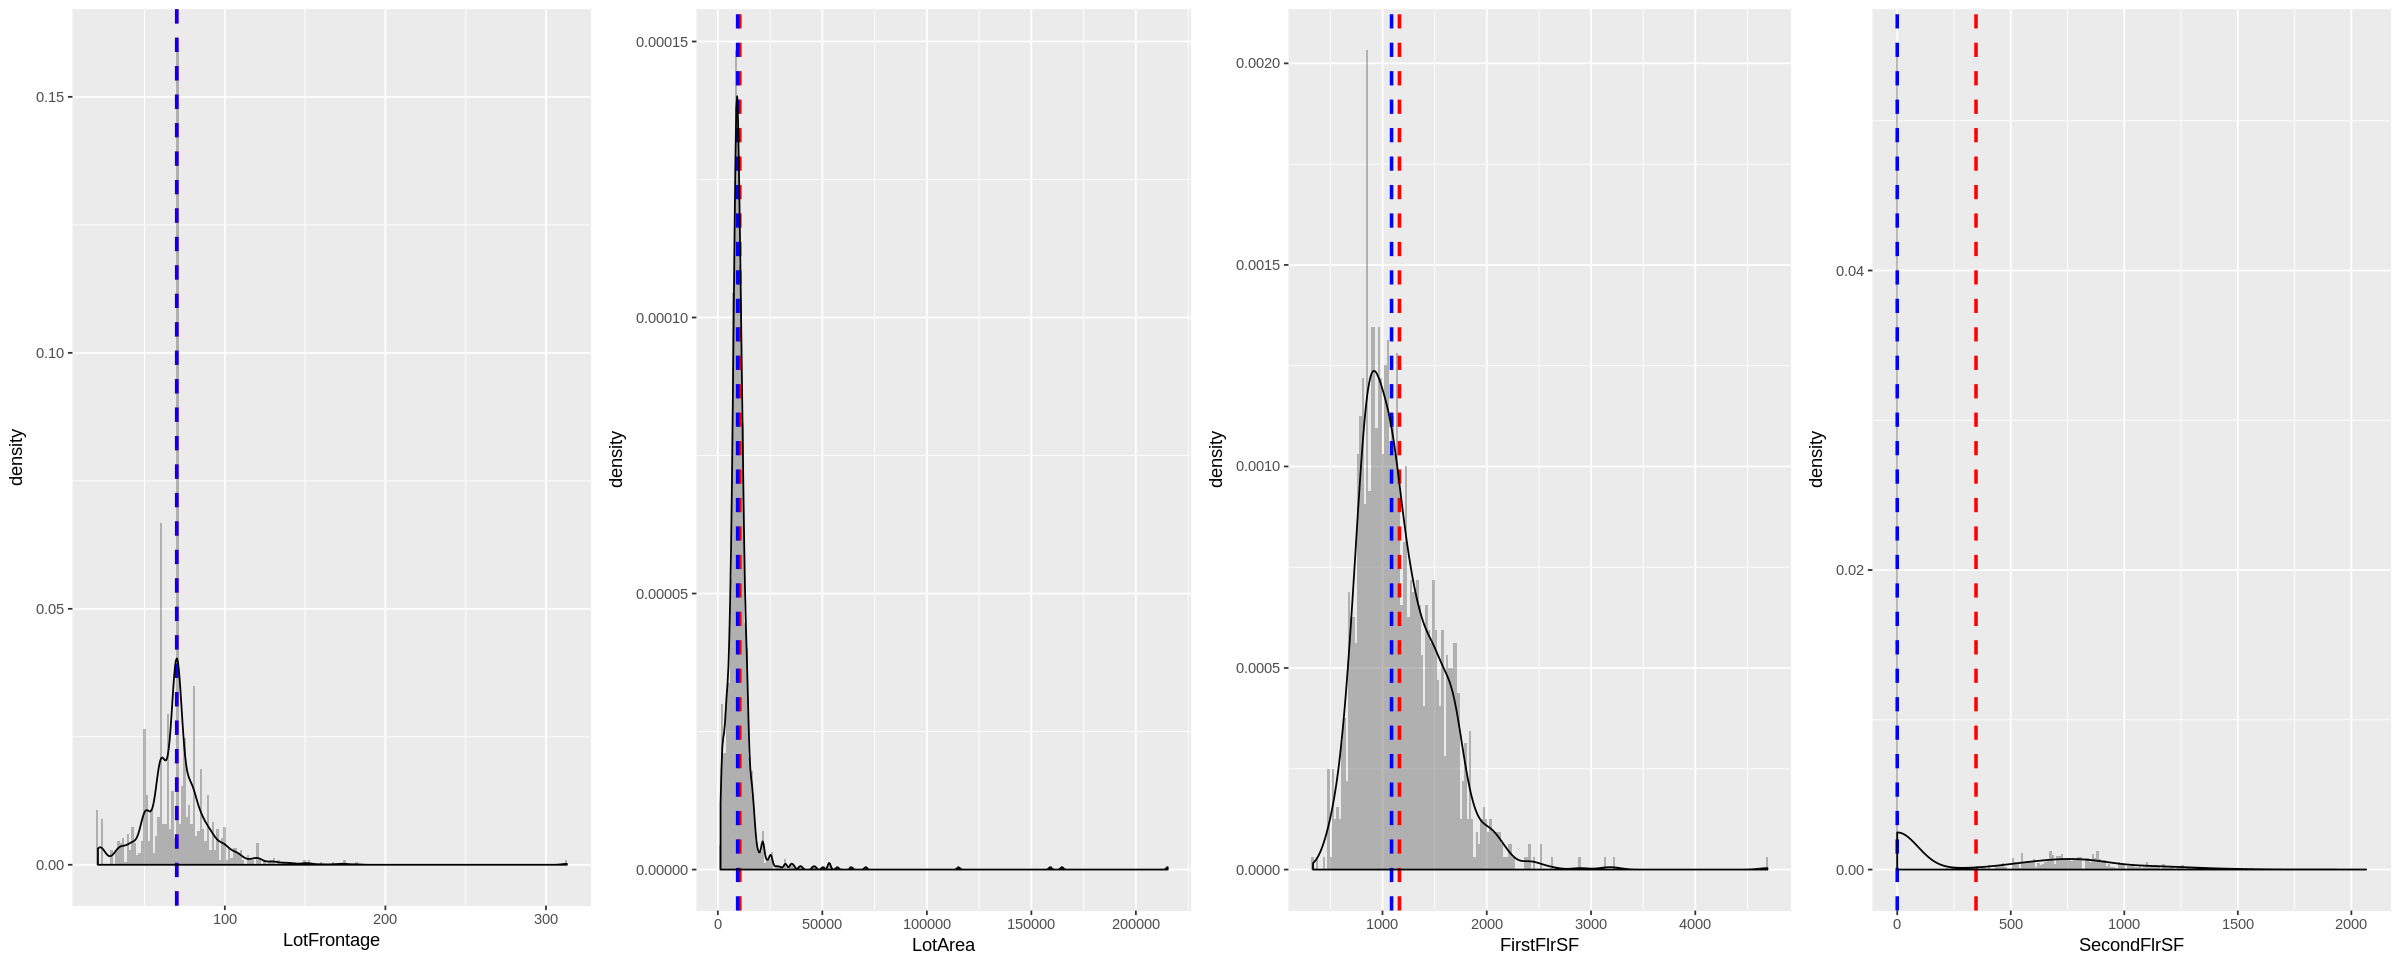

In [9]:
multiplot(hist_with_kde(ames_housing_df$LotFrontage, "LotFrontage"),
          hist_with_kde(ames_housing_df$LotArea, "LotArea"), 
          hist_with_kde(ames_housing_df$FirstFlrSF, "FirstFlrSF"),
          hist_with_kde(ames_housing_df$SecondFlrSF, "SecondFlrSF"),
          cols = 4)

Let's analyse the numerical features in the above plots from left to right.
All of the plots above are skewed to the right with a long tail to the right.

**Plot 1 - Lot Frontage (Linear sq feet of street connected to property)**
The mean LotFrontage here coincides with the peak (the most popular LotFrontage number which is roughly 70). Although there is a tail, there are few houses with LotFrontage above 130 hence, it does not seem to have have affected the mean.

**Plot 2** - Lot Area (Lot size in square feet)
LotArea sq. ft. seems to be very tightly fit around the mean as indicated by the long slim curve. The long tail, indicate a few houses with LotArea bigger than 25000 sq.ft. dragging the mean(red line) a little away from the median(blue line)

**Plot 3** - FirstFlrSF (First Floot Square Feet)
The First Floor Sq. ft. peak is roughly around 1100, meaning that most houses in the heighborhood have 1100 sq.ft for First floor. The long curve tail beyond 220 sq. ft. indicates that are some houses with first floor sq. ft beyond 2200 upto almost 4600 sq. ft, thereby dragging the average(red line) first floor sq. ft of houses away from the median (blue line).

**Plot 4** - SecondFlrSF (Second Floot Square Feet)
We have 2 peaks in this plot. The first peak is at 0, indicating that most houses don't have second floor. The second peak is at 750, indicating that most houses that do have a second floor have around 500 - 1000 sq. ft.,  750 sq feet being the average in that range.  

### Distribution of numeric features broken down by a categorical feature

Let's take a look at the categorical features and pick a few to analyze

In [10]:
str(Filter(is.factor, ames_housing_df))

'data.frame':	1460 obs. of  54 variables:
 $ MSSubClass   : Factor w/ 15 levels "20","30","40",..: 6 1 6 7 6 5 1 6 5 15 ...
 $ MSZoning     : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 5 4 ...
 $ LotShape     : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 1 1 1 1 4 1 4 4 ...
 $ LandContour  : Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities    : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig    : Factor w/ 5 levels "Corner","CulDSac",..: 5 3 5 1 3 5 5 1 5 1 ...
 $ LandSlope    : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ Neighborhood : Factor w/ 25 levels "Blmngtn","Blueste",..: 6 25 6 7 14 12 21 17 18 4 ...
 $ Condition1   : Factor w/ 9 levels "Artery","Feedr",..: 3 2 3 3 3 3 3 5 1 1 ...
 $ Condition2   : Factor w/ 8 levels "Artery","Feedr",..: 3 3 3 3 3 3 3 3 3 1 ...
 $ BldgType     : Factor w/ 5 levels "1Fam","2fmCon",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ HouseStyle   : Factor w/ 8 levels "1.5Fin","1.

##### Let's analyse some Features and Target(SalePrice) broken down by a categorical feature

**(a) Let's analyze the relationship between SalePrice and LotShape**

```
where,
Lot Shape: General shape of property

           Reg	Regular	
           IR1	Slightly irregular
           IR2	Moderately Irregular
           IR3	Irregular
```

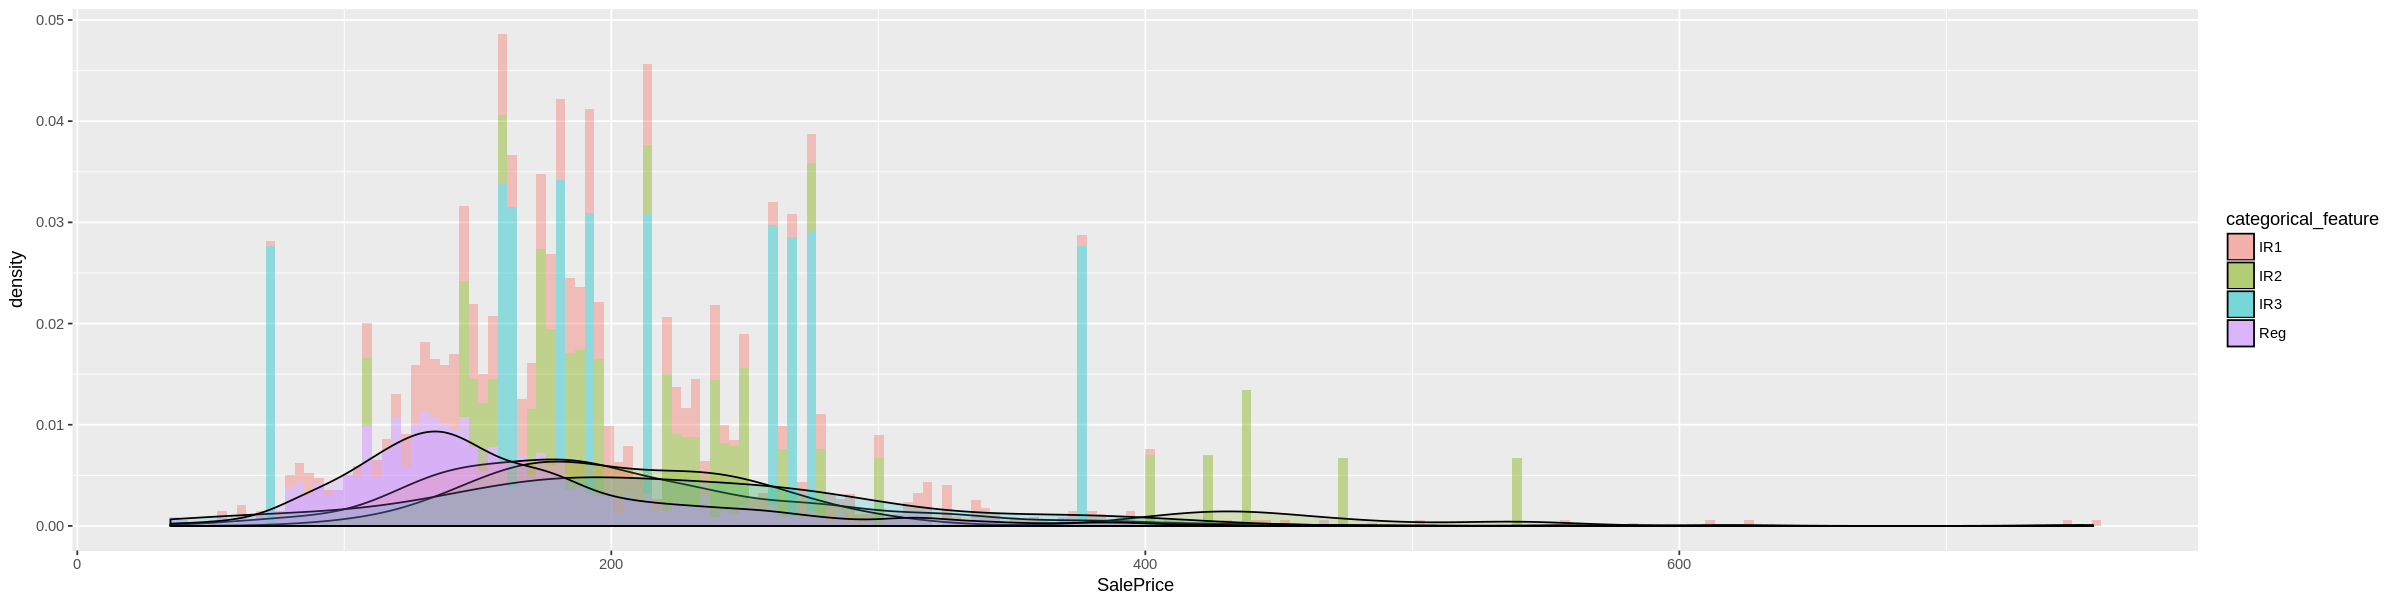

In [11]:
options(repr.plot.width=20, repr.plot.height=5)
hist_with_kde_numerical_by_category(ames_housing_df$SalePrice/1000, ames_housing_df$LotShape, "SalePrice", "LotShape")

- Houses with SalePrice < 150K are have Regular/Reg LotShape (purple).
- LotShape Moderately Irregular/IR2 (green) and Slightly Irregular/IR2 seem to be widely distributed among houses with SalePrice > 100K, with Moderately Irregular being more popular than Slightly Irregular.
- Lot Shape Irregular/IR3 (blue) seems to be very popular with certain type of houses and does not show any pattern w.r.t. SalePrice.
- To Summarize, more irregular the LotShape, Higher the SalePrice. 

**(b) Let's analyze the relationship between SalePrice and LandSlope**
```
where,
Land Slope: Slope of property

           Gtl	Gentle slope  (red)
           Mod	Moderate Slope	(green)
           Sev	Severe Slope (blue)
```

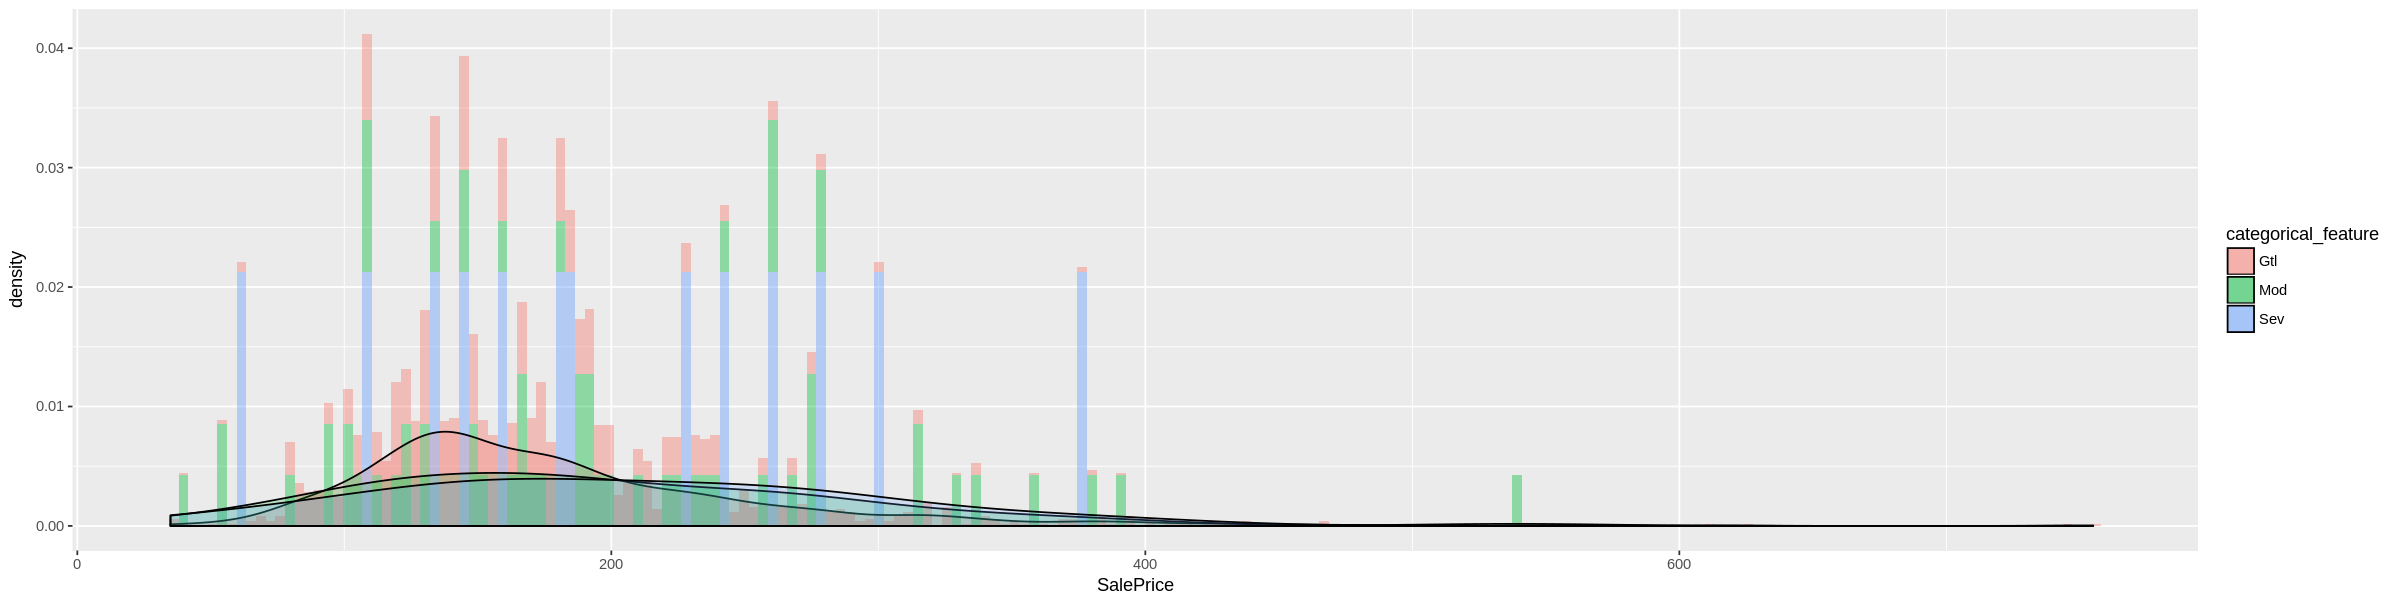

In [12]:
options(repr.plot.width=20, repr.plot.height=5)
hist_with_kde_numerical_by_category(ames_housing_df$SalePrice/1000, ames_housing_df$LandSlope, "SalePrice", "LandSlope")

- All 3 types of LandSlope, Gentle slope(red), Moderate Slope(green), Severe Slope(blue) seem to be distributed among the houses, with Moderate Slope (green) and Severe Slope (blue) the being most preferred.

- Most houses with SalePrice > 250K generally seem to have either Moderate Slope or Severe Slope.


**(c) Let's analyze its YearBuilt with Street access to property**
```
Street: Type of road access to property

           Grvl	Gravel	
           Pave	Paved
```

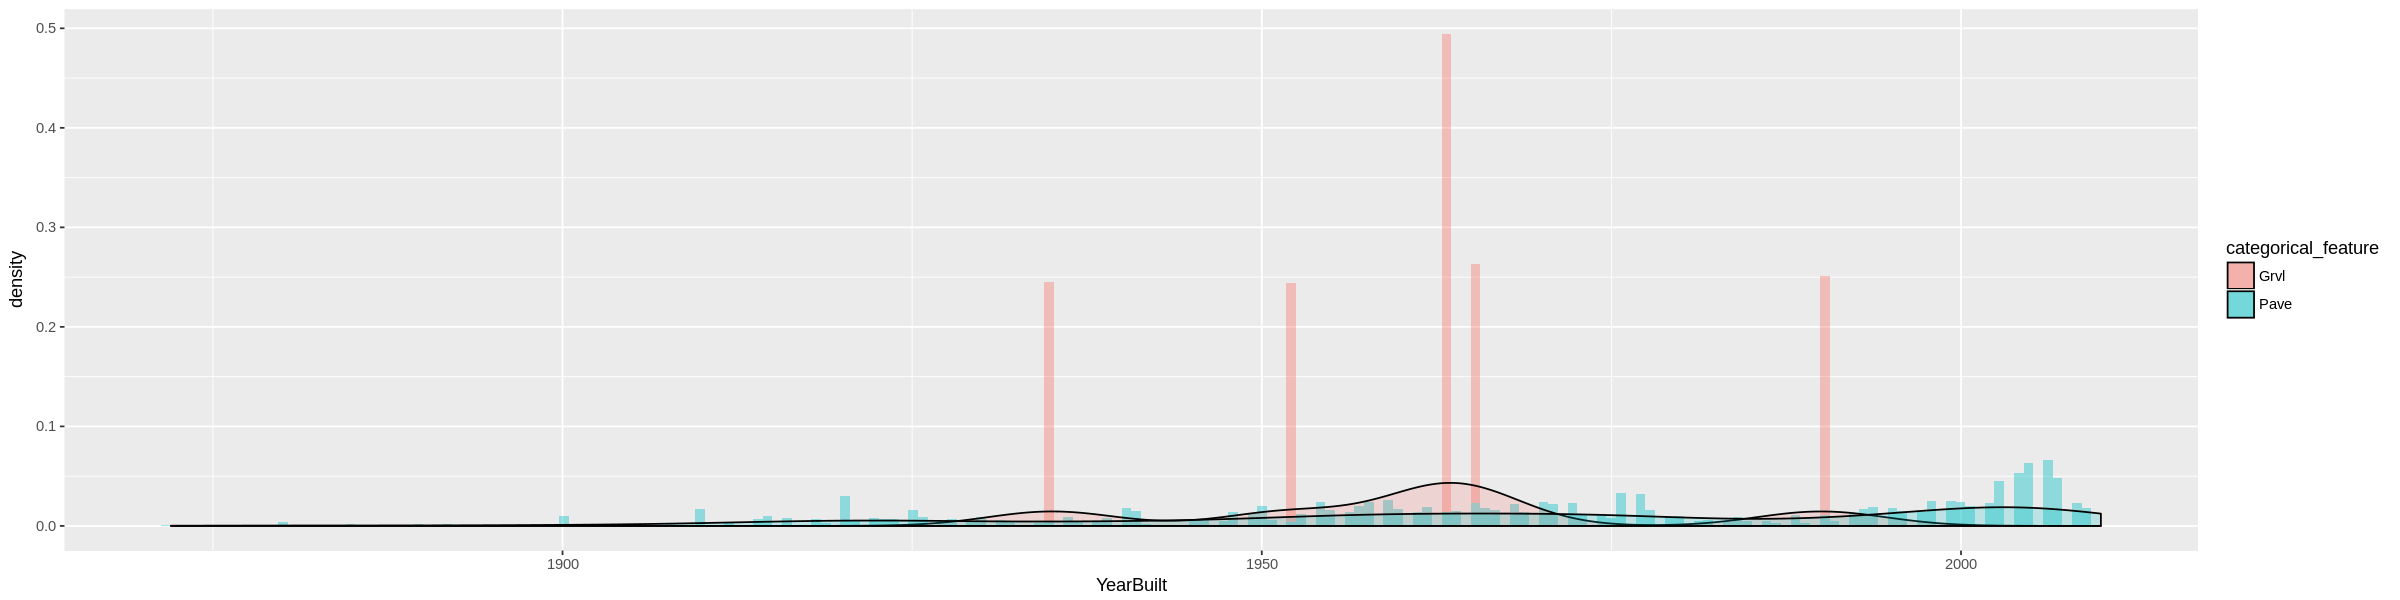

In [13]:
hist_with_kde_numerical_by_category(ames_housing_df$YearBuilt, ames_housing_df$Street, "YearBuilt", "Street")

- The above plot seems to indicate that, older the house, the greater the chance of the property having Gravel access to Street.

- Houses built after 1995 have paved access to street.

**(d) Let's analyze YearBuilt with GarageArea**


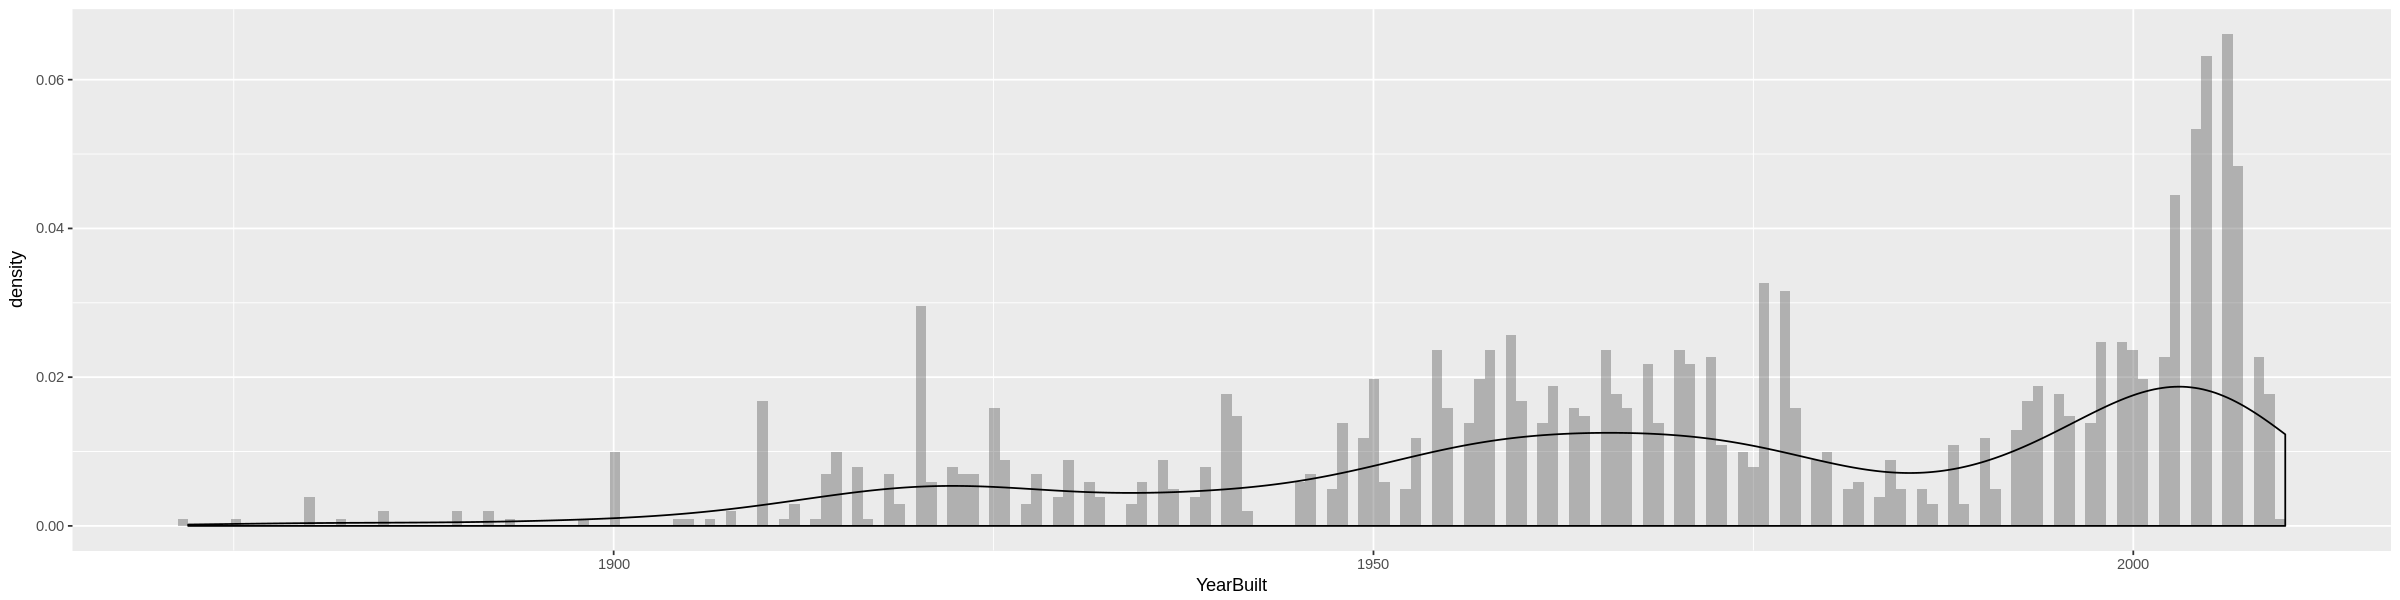

In [14]:
hist_with_kde_numerical_by_category(ames_housing_df$YearBuilt, ames_housing_df$GarageArea, "YearBuilt", "GarageArea")

- The plot shows an upward trend indicating that more recently built houses are more likely to have a larger garage area.

### Correlations

Let's see how the numerical features and target are correlated.

In [15]:
cor_df = cor(Filter(is.numeric, ames_housing_df))

There are a lot of numerical features. So let's use corrplot to view the significant correlations.

In [16]:
install.packages("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


corrplot 0.84 loaded


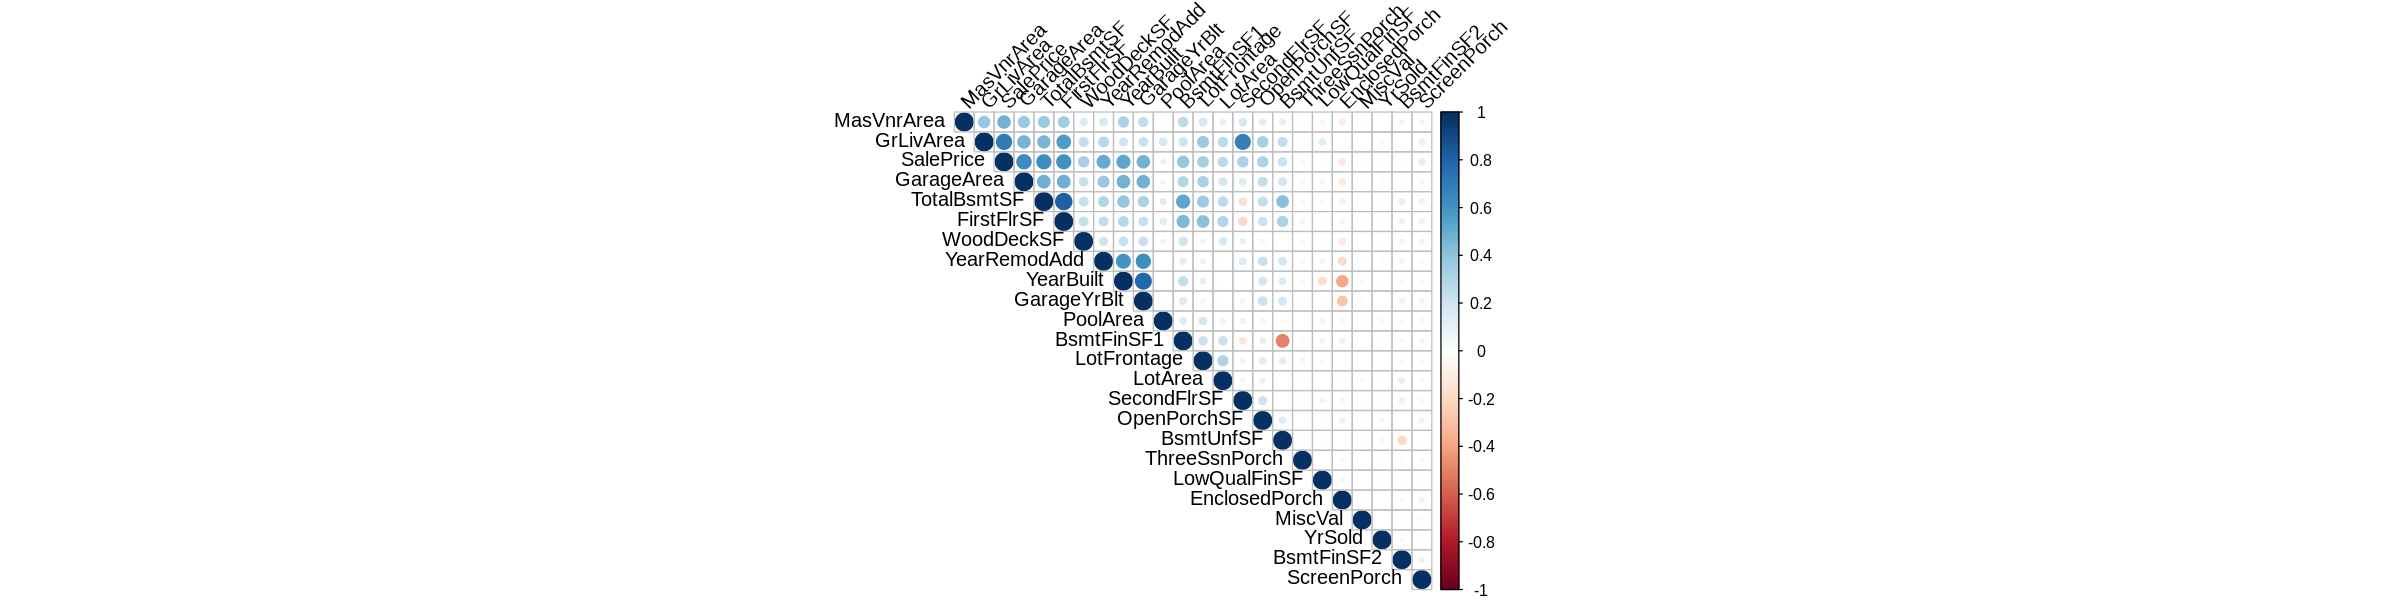

In [17]:
library(corrplot)
corrplot(cor_df, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

**Positive correlations are displayed in blue and negative correlations in red color. Color intensity and the size of the circle are proportional to the correlation coefficients.**

**From the plot we can see that the following are significantly correlated (bigger and brighter dots)**

GrLivArea & SecondFlrSF (+ve ly related)

GrLivArea & FirstFlrSF  (+ve ly related)

GrLivArea & SalePrice (+ve ly related)

GrLivArea & GarageArea (+ve ly related)

GrLivArea & TotalBsmtSF (+ve ly related)

TotalBsmtSF & FirstFlrSF (+ve ly related)

SalePrice & FirstFlrSF (+ve ly related)

SalePrice & GarageArea (+ve ly related)

SalePrice & TotalBsmtSF  (+ve ly related)

YearBuilt & GarageYrBlt (+ve ly related)

YearBuilt & YearRemodAdd (+ve ly related)

BsmtFinSF1 & BsmtUnfSF (-ve ly related)**

**Let's view just the significant correlations in a pair plot as well, to further visuallize the relationship between the variables**


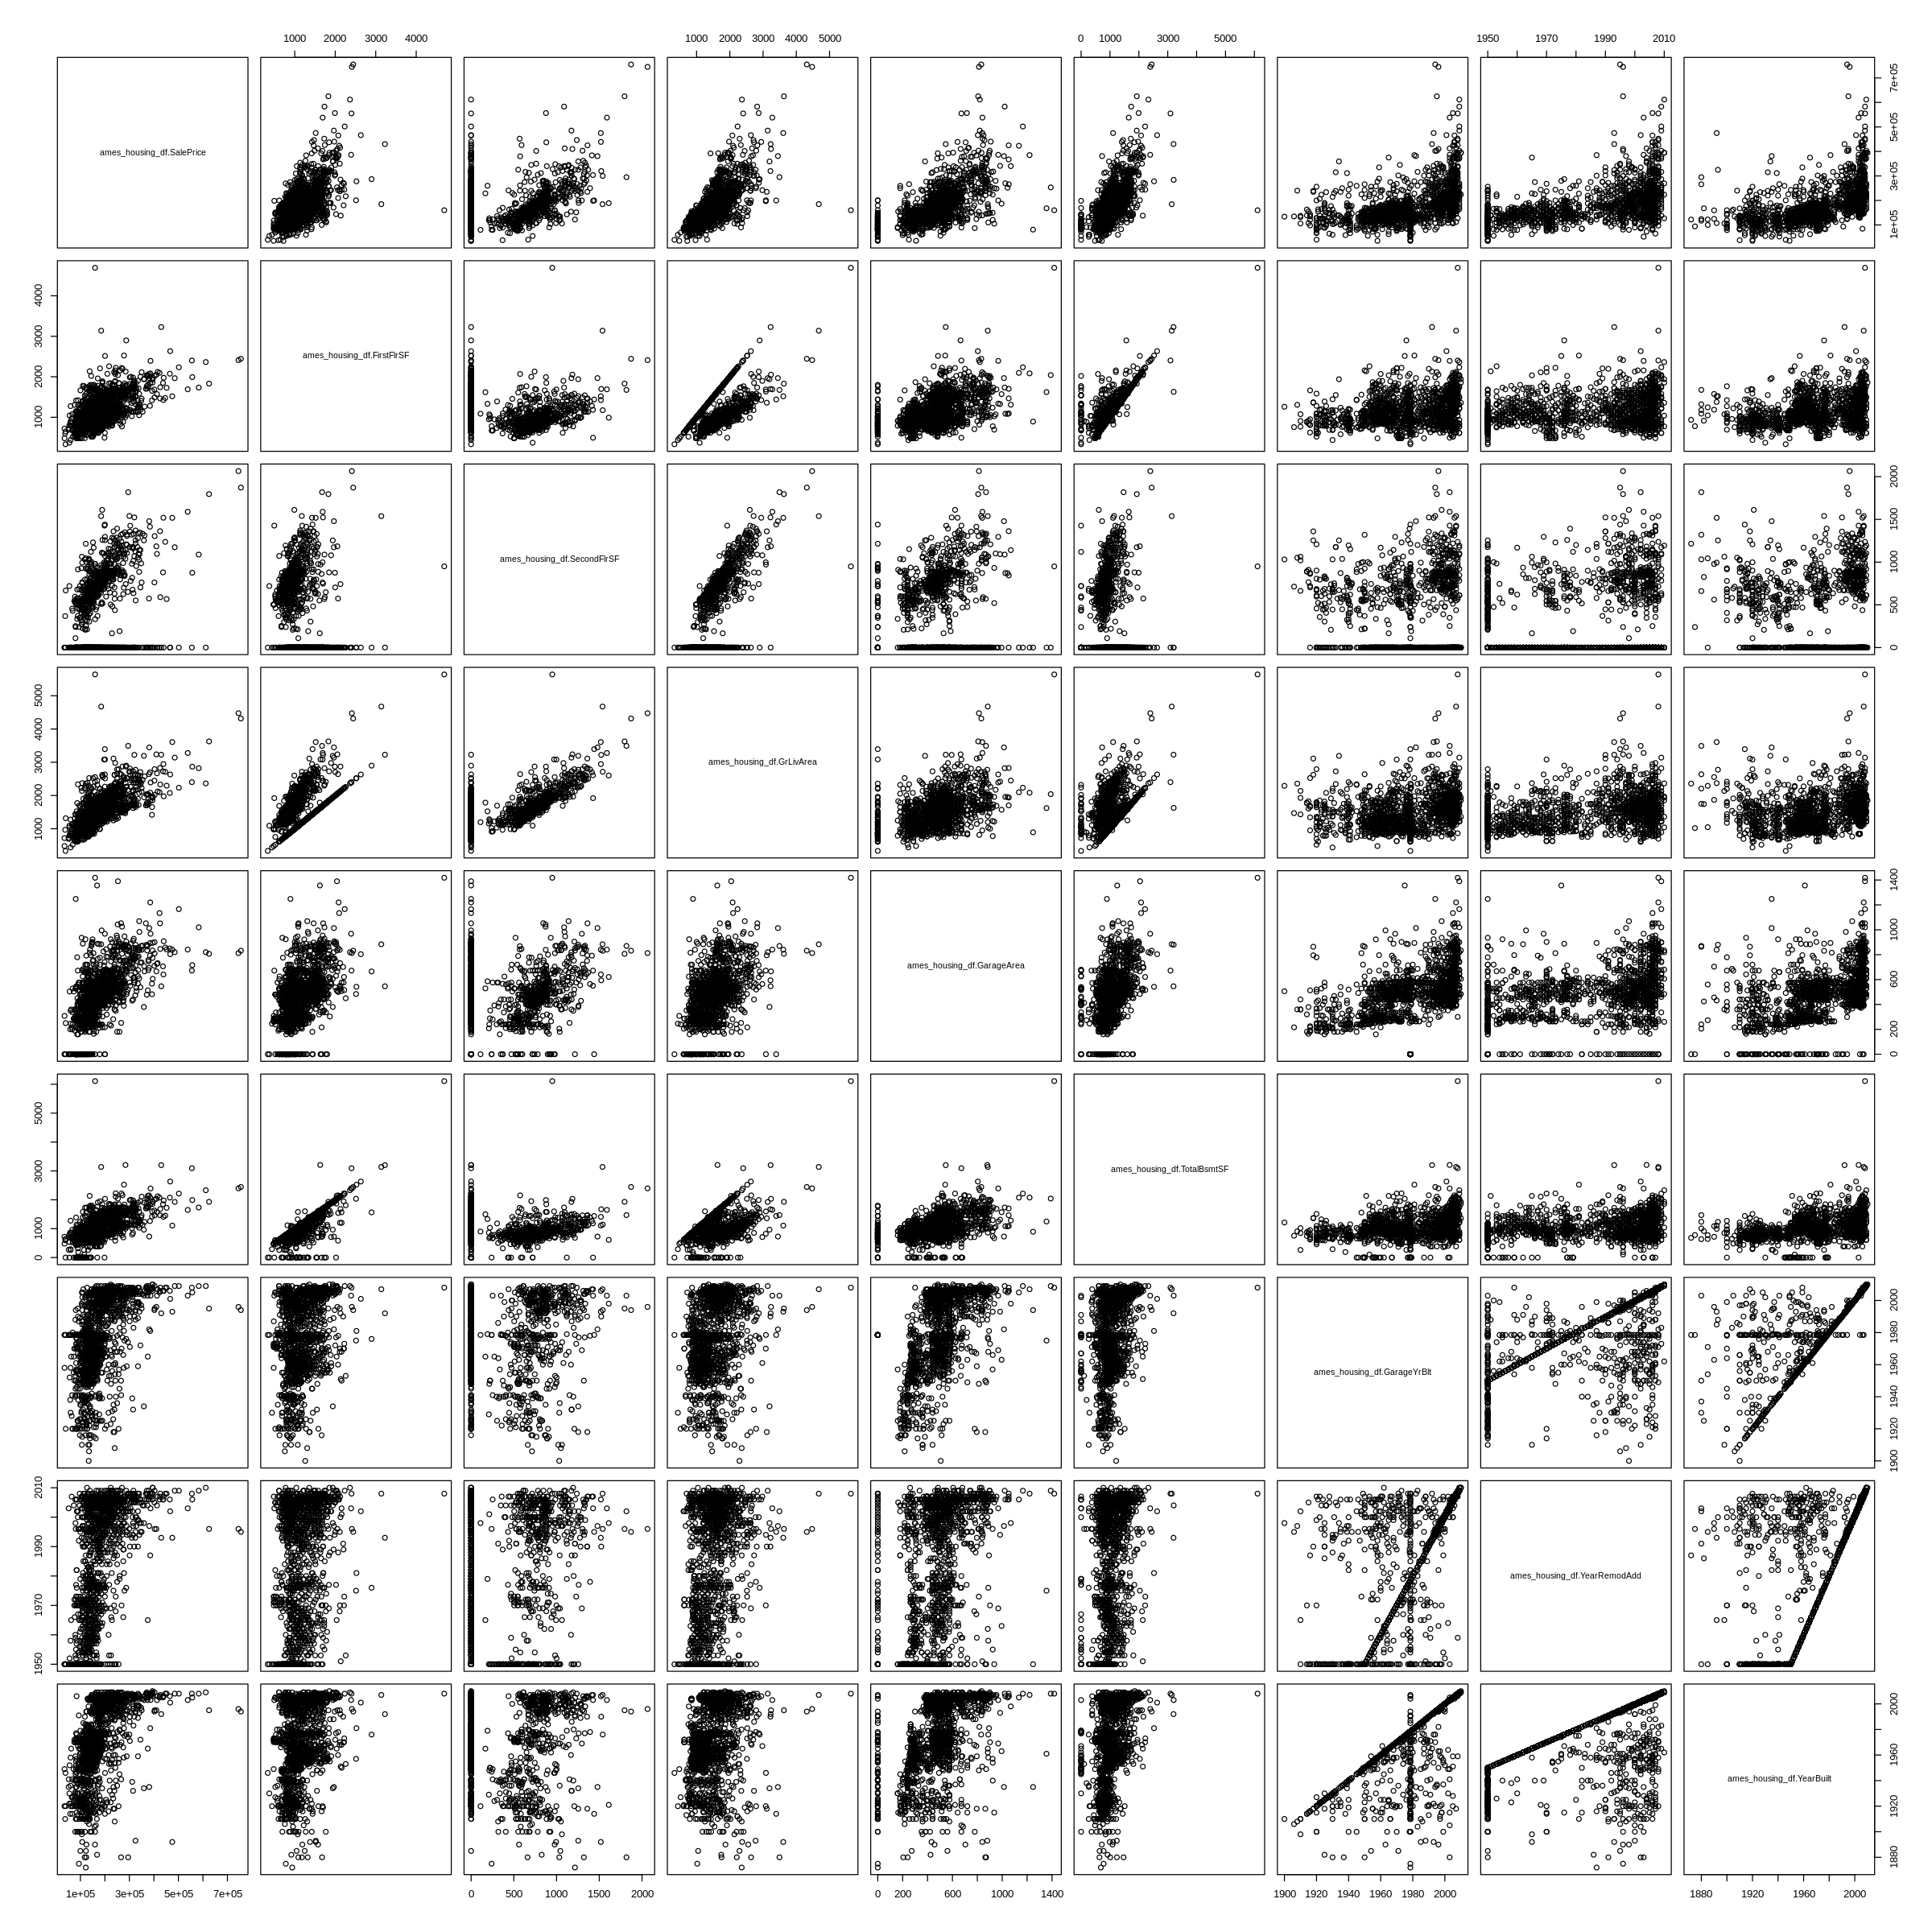

In [18]:
options(repr.plot.width=20, repr.plot.height=20)
pairs(data.frame(ames_housing_df$SalePrice, ames_housing_df$FirstFlrSF, ames_housing_df$SecondFlrSF, ames_housing_df$GrLivArea, ames_housing_df$GarageArea, ames_housing_df$TotalBsmtSF, ames_housing_df$GarageYrBlt, ames_housing_df$YearRemodAdd, ames_housing_df$YearBuilt))

### Comparison Plots


#### (a) Let's compare GrLivArea and SalePrice

```Gr Liv Area (Continuous): Above grade (ground) living area square feet``` 

In [19]:
attach(ames_housing_df)

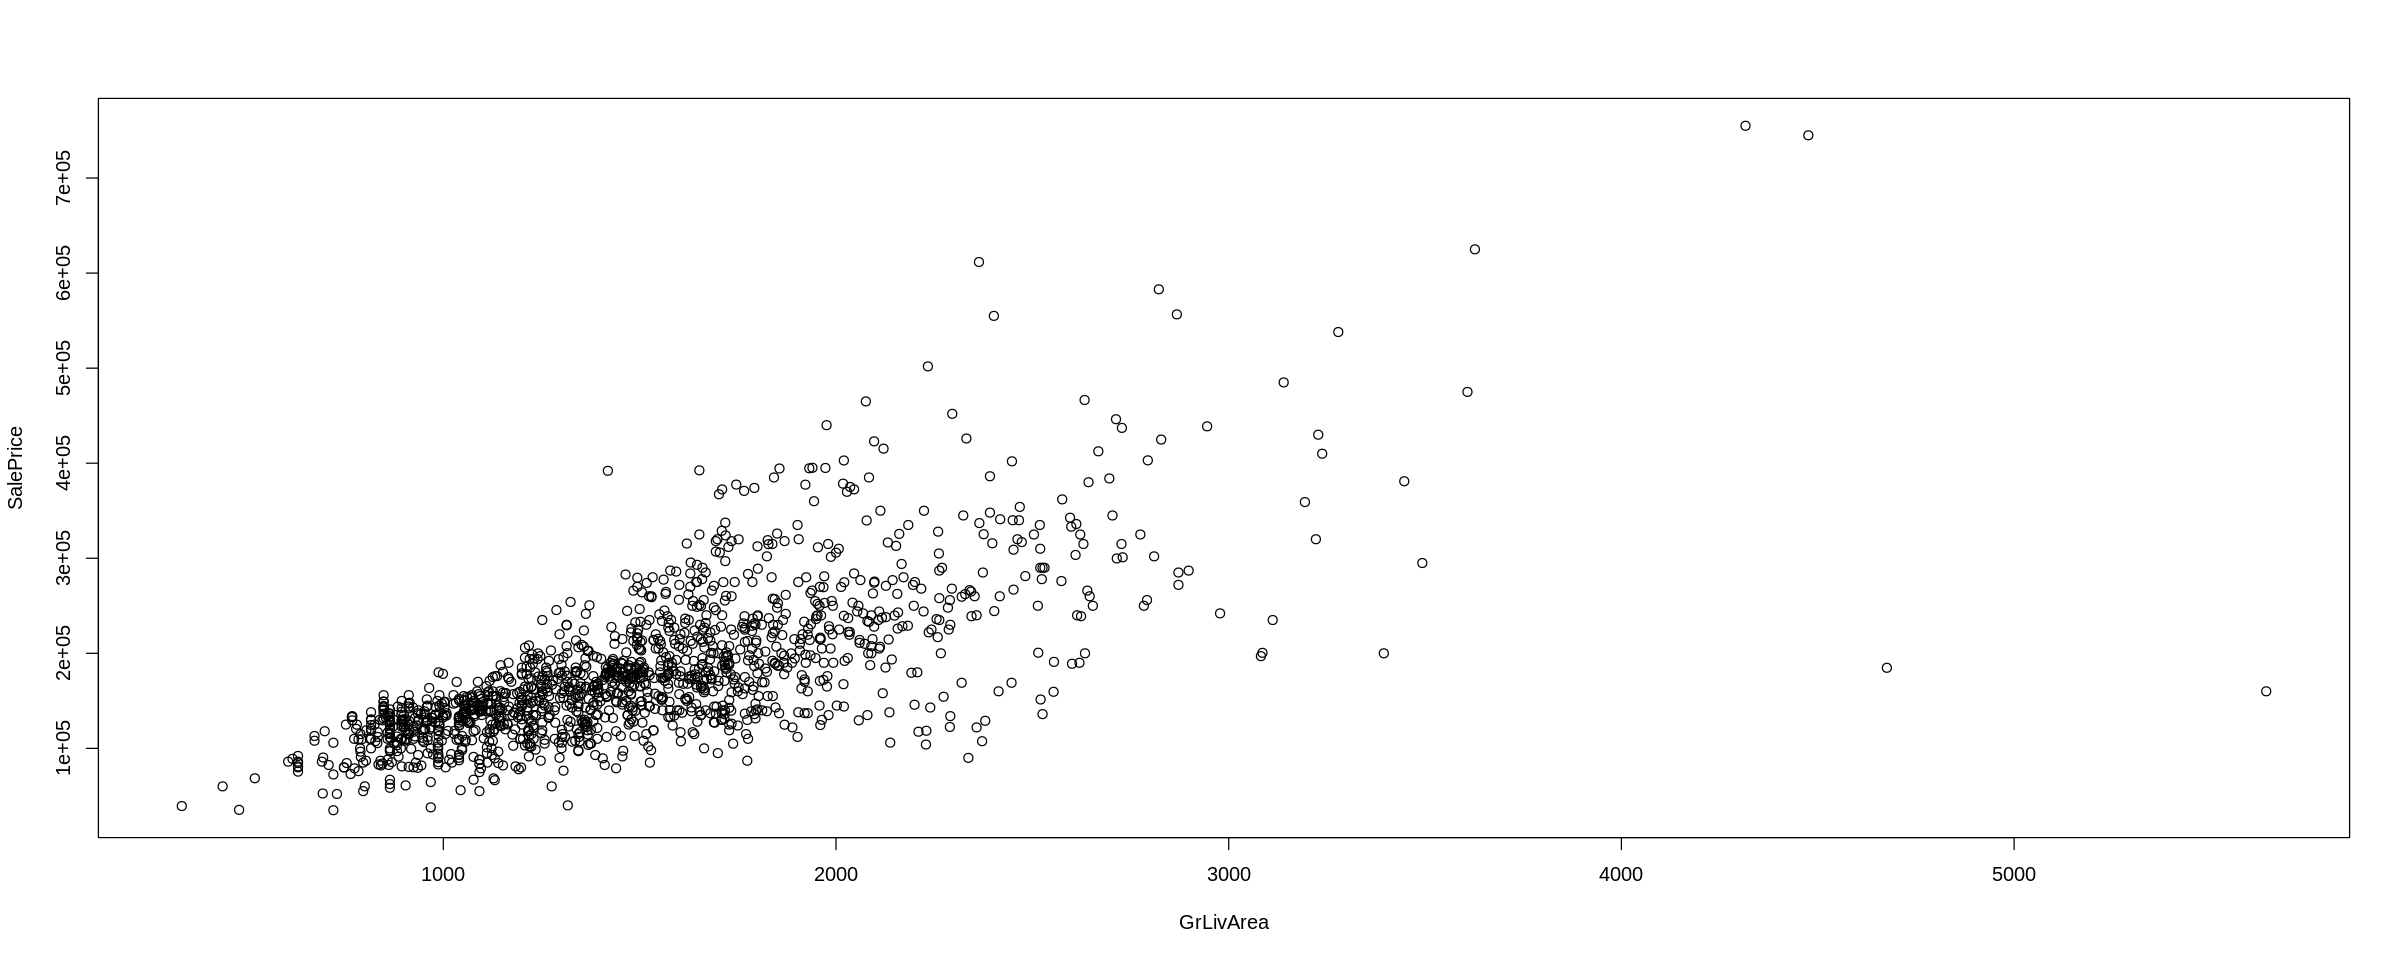

In [20]:
options(repr.plot.width=20, repr.plot.height=8)
plot(GrLivArea, SalePrice)

- We can see from the Plot that there is a positive Linear relationship between GrLivArea and SalePrice, meaning that when one increases the other increases and vice versa.

#### Now let's color the plot by a Factor and see how the factor is related to GrPlotLiv and SalePrice

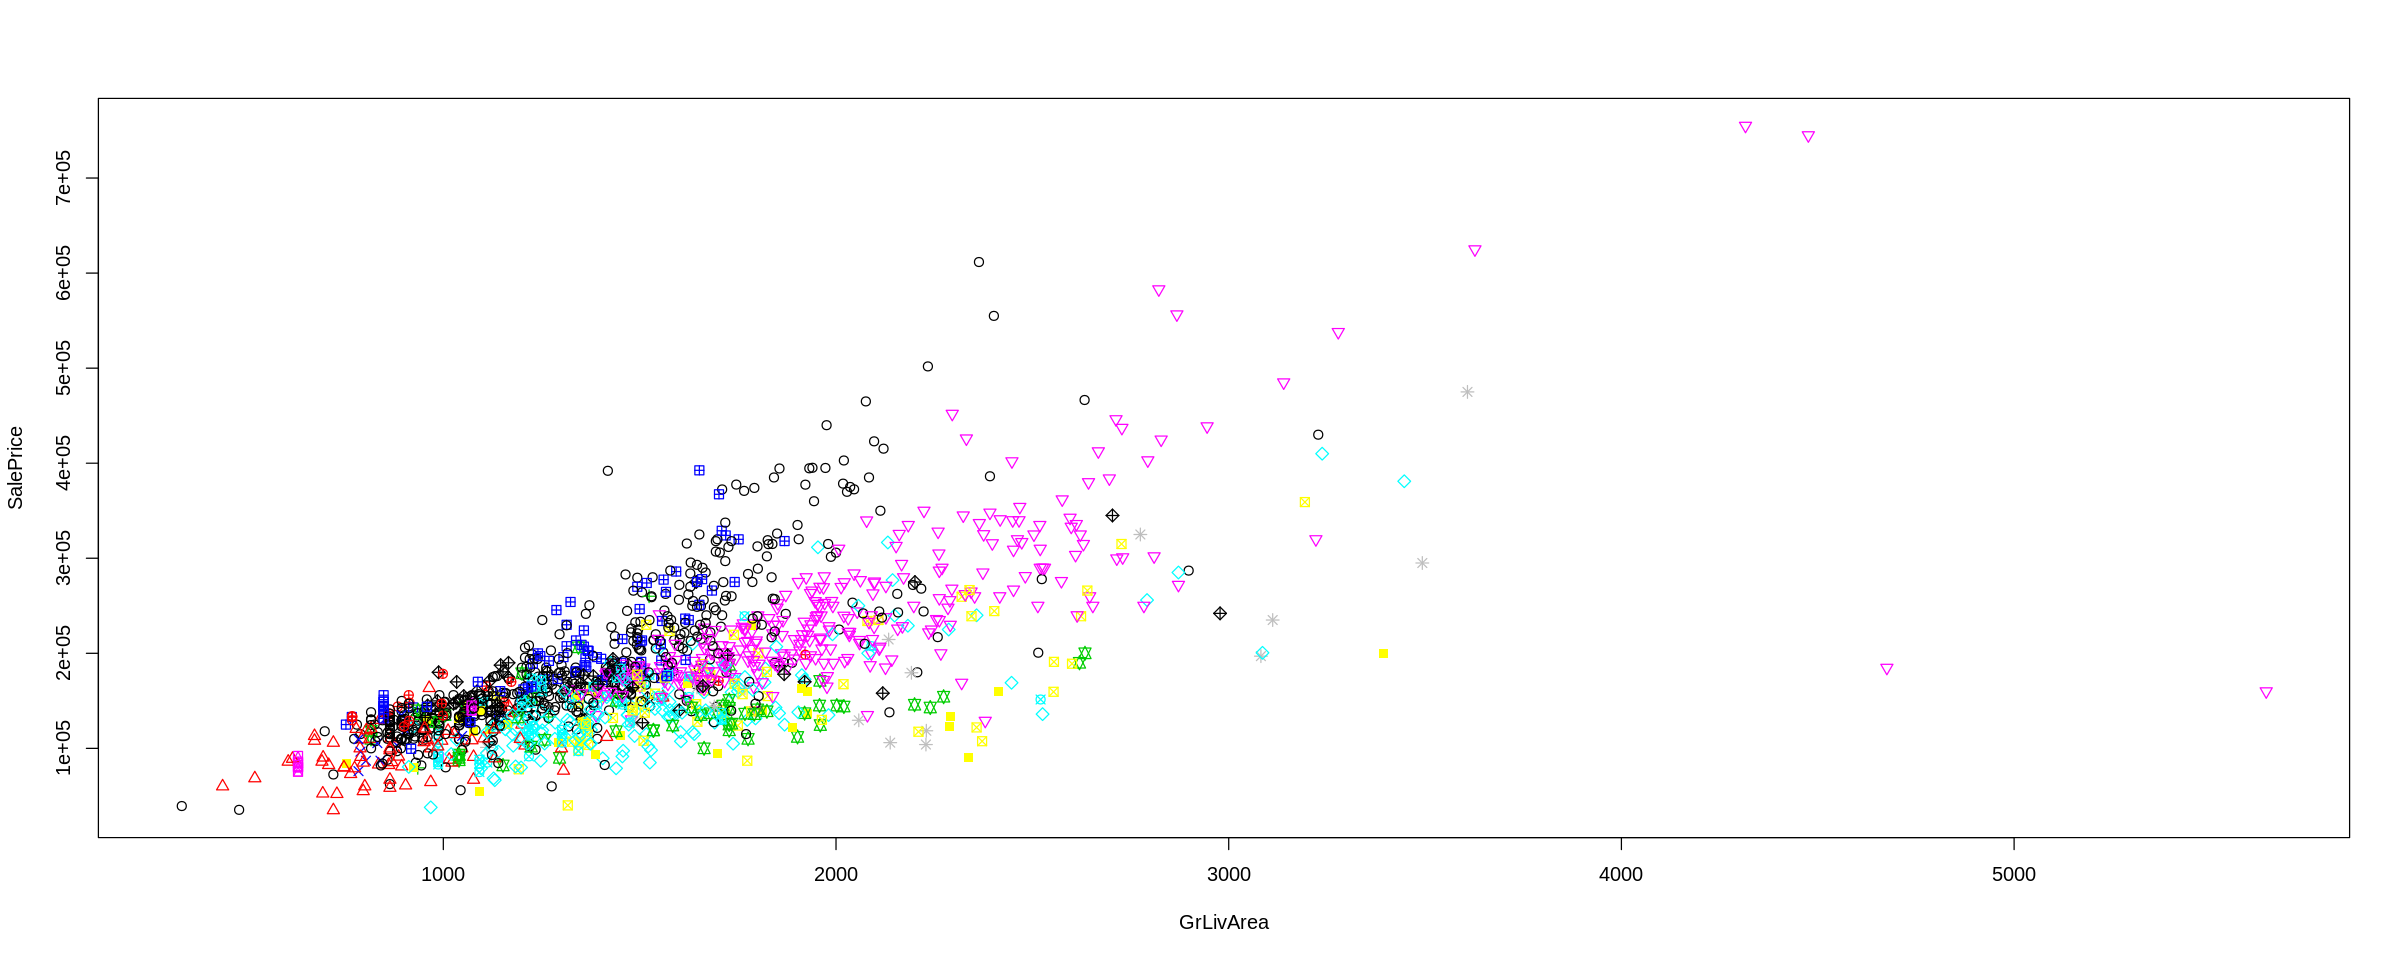

In [21]:
ms_sub_class = as.integer(MSSubClass)
plot(GrLivArea, SalePrice, pch = ms_sub_class, col =  ms_sub_class)